Dados tirado da UCI

Medidas de consumo de energia elétrica em uma residência com uma taxa de amostragem de um minuto durante um periodo de quase 4 anos. Diferentes grandezas elétricas e alguns valores de submedição estão disponivél 

VARIAVEIS

1.date: Date in format dd/mm/yyyy

2.time: time in format hh:mm:ss

3.global_active_power: household global minute-averaged active power (in kilowatt)

4.global_reactive_power: household global minute-averaged reactive power (in kilowatt)

5.voltage: minute-averaged voltage (in volt)

6.global_intensity: household global minute-averaged current intensity (in ampere)

7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

Máquina Preditiva que realiza o Agrupamento de Clientes por Consumo de Energia Elétrica. Esse agrupamento, ou Clusterização, é feito por meio do algoritmo Kmeans. Essa Clusterização é conhecida como aprendizagem Não-Supervisionada.

Irá utilizar o PCA (outro algoritmo de aprendizagem Não-Supervisionada), que serve para reduzir a dimensionalidade das variáveis que a gente tem. Vamos reduzir de 7 para 2 (que são componentes principais)


Tera que fazer um pré processamento

cod com aprendizagem Não-Supervisionada

consumo de energia de clientes

In [2]:
# imports 
import pandas as pd
import numpy as np
import matplotlib.pylab as plt 
from matplotlib import pylab
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# carregando dados e ler o arquivo txt
dataset = pd.read_csv('household_power_consumption.txt', delimiter=';',low_memory=False)

In [4]:
# vizualizar as primeiras linha
dataset.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
# dimensões do Dataset em linhas e colunas respectivamente
dataset.shape

(2075259, 9)

In [6]:
#verificando o tipo dos campos
dataset.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [7]:
# informações gerais do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [8]:
# checando se há valores faltando (missing)
dataset.isnull().values.any()

True

In [9]:
# checando onde há valores faltando (missing)
dataset.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

Pré processar 

In [10]:
#remover os registros com valores NA(faltando) e remove as duas primeiras colunas (data e tempo - elas não são necessarias)
dataset = dataset.iloc[0:,2:9].dropna()

In [11]:
# verifica as primeiras linhas
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [12]:
# checando se ainda tem valores missing 
dataset.isnull().values.any()

False

In [13]:
# checando onde há valores faltando (missing)
dataset.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [14]:
# obtém os valores dos atributos. obtem os valorse de cada variavel num formato de array
dataset_atrib = dataset.values #dataset_atrib é X

In [15]:
#imprime o array
dataset_atrib # variaveis de entrada, os valores de x

array([['4.216', '0.418', '234.840', ..., '0.000', '1.000', 17.0],
       ['5.360', '0.436', '233.630', ..., '0.000', '1.000', 16.0],
       ['5.374', '0.498', '233.290', ..., '0.000', '2.000', 17.0],
       ...,
       ['0.938', '0.000', '239.820', ..., '0.000', '0.000', 0.0],
       ['0.934', '0.000', '239.700', ..., '0.000', '0.000', 0.0],
       ['0.932', '0.000', '239.550', ..., '0.000', '0.000', 0.0]],
      dtype=object)

In [16]:
#coleta uma amostra de 1% dos dados para não comprometer a memoria do pc (isso pq o dataset é muito grande)
dataset, amostra2 = train_test_split(dataset_atrib, train_size=.01)

In [17]:
dataset.shape

(20492, 7)

Máquna preditiva segmentação de clientes

PCA é uma técnica de aprendizagem Não-Supervisionada utilizada para reduzir a dimensionalidade dos dados

PCA reduz a quantidade de variaveis

vai transformar as 7 variavees em 2 compoenntes princiapais 

separar por similaridade 

In [18]:
# aplica redução de dimensionalidade no array das variaveis 
pca = PCA(n_components=2).fit_transform(dataset)

In [19]:
# determine um range do hyperparametro "K" do Kmeans
k_range = range(1,12)
k_range

range(1, 12)

In [20]:
# aplicando o modelo kmeans para cada valor de K (está cedula pode levar bastante tempo para ser executada)
k_means_var = [KMeans(n_clusters=k).fit(pca) for k in k_range]

para cada valor de k na range k_range (1-12)

ele vai chamar o kmeans, passar o valor de k e fazer o fit(treinar)

Curva de Elbow

Text(0.5, 1.0, 'Variância Explicada para cada Valor de K')

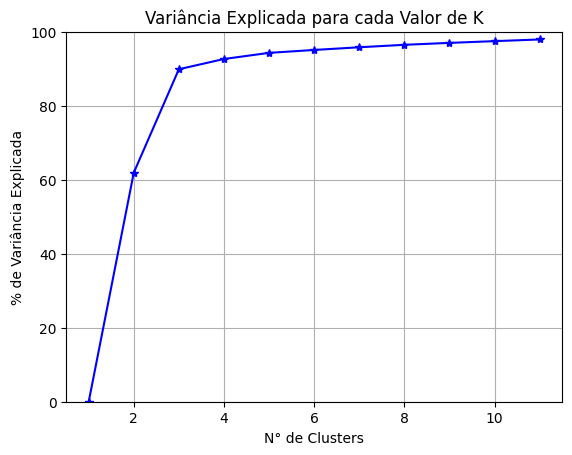

In [21]:
# ajustando o centroíde do cluster para cada modelo (são 12)
centroids = [X.cluster_centers_ for X in k_means_var]

# Calculando a distancia euclidiana de cada ponto de dado para o centro
k_euclid = [cdist(pca,cent, 'euclidean') for cent in centroids]
dist = [np.min(ke,axis =1) for ke in k_euclid]

# soma dos quadrados das distancias dentro do cluster
soma_quadrados_intra_cluster = [sum(d**2) for d in dist]

# soma total dos quadrados
soma_total = sum(pdist(pca)**2)/pca.shape[0]

# soma dos quadrados entre clusters
soma_quadrados_intra_cluster = soma_total - soma_quadrados_intra_cluster

#curva de elbow
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, soma_quadrados_intra_cluster/soma_total * 100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('N° de Clusters')
plt.ylabel('% de Variância Explicada')
plt.title('Variância Explicada para cada Valor de K')



Escolhendo um valor de K inicial (igual a 8) para a avaliação da máquina preditiva

In [27]:
# criando um modelo com K = 8
modelo_v1 = KMeans(n_clusters=8)
modelo_v1.fit(pca)


KMeans()

avaliar a máquina preditiva V1 com k=8

In [23]:
#obtém os valores mínimos e máximos e organiza o shape
x_min, x_max = pca[:,0].min() - 5, pca[:,0].max() -1
y_min, y_max = pca[:,1].min() + 1, pca[:,1].max() +5
xx,yy=np.meshgrid(np.arange(x_min,x_max,.02), np.arange(y_min,y_max,.02))
Z = modelo_v1.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

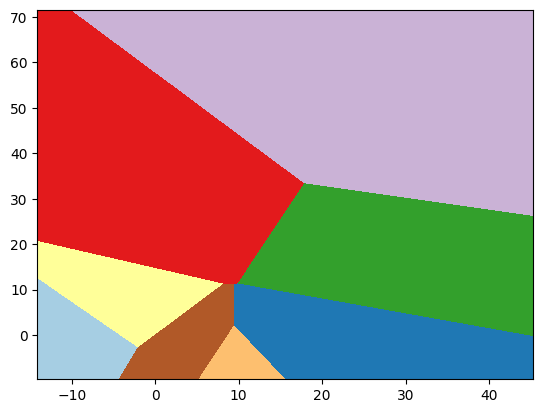

In [24]:
# plot das areas dos clusters
plt.figure(1)
plt.clf()
plt.imshow(Z,
            interpolation = 'nearest',
            extent =(xx.min(),xx.max(),yy.min(),yy.max()),
            cmap = plt.cm.Paired,
            aspect = 'auto',
            origin = 'lower')
            
            #vizulização dos clusters


In [25]:
#métrica de avaliação para Clusterização
# the best value is 1 and the worst value is -1
silhouette_score

<function sklearn.metrics.cluster._unsupervised.silhouette_score(X, labels, *, metric='euclidean', sample_size=None, random_state=None, **kwds)>

In [28]:
# silhouette Score
labels = modelo_v1.labels_
# vai precisar dos dados de entrada, labels e a matetrica da distancia euclidiana
silhouette_score(pca,labels,metric = 'euclidean')

0.6497371241535855

In [57]:
# criando um modelo com K = 9
modelo_v1 = KMeans(n_clusters=9)
modelo_v1.fit(pca)


KMeans(n_clusters=9)

In [58]:
# silhouette Score
labels = modelo_v1.labels_
# vai precisar dos dados de entrada, labels e a matetrica da distancia euclidiana
silhouette_score(pca,labels,metric = 'euclidean')

0.6730993341407803

In [51]:
# criando um modelo com K = 10
modelo_v1 = KMeans(n_clusters=10)
modelo_v1.fit(pca)

KMeans(n_clusters=10)

In [52]:
# silhouette Score
labels = modelo_v1.labels_
# vai precisar dos dados de entrada, labels e a matetrica da distancia euclidiana
silhouette_score(pca,labels,metric = 'euclidean')

0.675437665769764

In [53]:
# criando um modelo com K = 11
modelo_v1 = KMeans(n_clusters=11)
modelo_v1.fit(pca)

KMeans(n_clusters=11)

In [54]:
# silhouette Score
labels = modelo_v1.labels_
# vai precisar dos dados de entrada, labels e a matetrica da distancia euclidiana
silhouette_score(pca,labels,metric = 'euclidean')

0.6284933979619228

Usando a marcação dos clusters da máquina preditiva final

In [63]:
# lista com nomes das colunas
names = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']

In [65]:
# Incluindo o n° do cluster na de cliente
cluster_map = pd.DataFrame(dataset, columns = names)
cluster_map ['Global_active_power'] = pd.to_numeric(cluster_map['Global_active_power']) # passar variavel Global_active_power em numeric
cluster_map['cluster'] = modelo_v1.labels_

In [67]:
cluster_map

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,cluster
0,0.216,0.104,244.600,1.000,0.000,1.000,0.0,0
1,0.182,0.110,240.140,0.800,0.000,0.000,0.0,0
2,0.242,0.096,240.040,1.000,0.000,2.000,1.0,0
3,0.238,0.000,246.900,1.000,0.000,0.000,1.0,0
4,0.460,0.000,247.730,1.800,0.000,0.000,0.0,0
...,...,...,...,...,...,...,...,...
20487,0.118,0.076,238.600,0.600,0.000,0.000,1.0,0
20488,0.468,0.320,241.940,2.200,0.000,2.000,1.0,0
20489,2.234,0.146,243.750,9.200,0.000,0.000,0.0,7
20490,1.264,0.000,239.300,5.200,0.000,0.000,18.0,1


In [68]:
# calcula a média do consumo de energia por cluster
cluster_map.groupby('cluster')['Global_active_power'].mean()

#grouby por cluster calculando a media


cluster
0    0.359285
1    1.821033
2    4.679469
3    2.718954
4    3.336502
5    3.842452
6    2.379257
7    1.478962
8    1.112164
Name: Global_active_power, dtype: float64